1) Loading data
CRITERION: 0.368259482727
NMI: 0.930673152976
ARI: 0.959306989875
ACCURACY: 0.986378822925


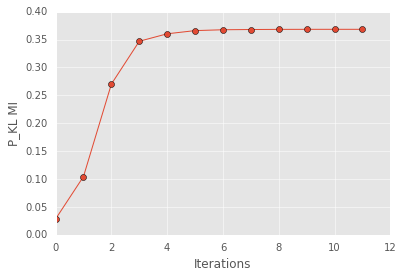

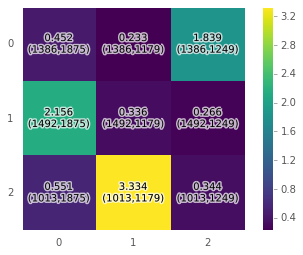

In [1]:
%matplotlib inline
import scipy.io as io
from coclust.CoclustInfo import CoclustInfo
from coclust.utils.evaluation import (print_NMI_and_ARI,
                                      plot_convergence,
                                      accuracy,
                                      plot_delta_kl)

# Retrieve the Classic3  document-term matrix from a matlab file
print("1) Loading data")
file_name = "../datasets/classic3.mat"
matlab_dict = io.loadmat(file_name)
X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
nb_clusters = 3
model = CoclustInfo(n_row_clusters=nb_clusters, n_col_clusters=nb_clusters,
                    n_init=4, random_state=0)
model.fit(X)

# Evaluate the results
print("CRITERION: %s" % model.criterion)
true_row_labels = matlab_dict['labels'].flatten()
predicted_row_labels = model.row_labels_
print_NMI_and_ARI(true_row_labels, predicted_row_labels)
accuracy = accuracy(X, nb_clusters, true_row_labels, predicted_row_labels)
print("ACCURACY: %s" % accuracy)

# Show convergence
plot_convergence(model.criterions, 'P_KL MI', marker='o')

plot_delta_kl(model.delta_kl_, model)